In [51]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the Excel file
file_path = r"C:\RP_Data.xlsx"  # Use raw string to avoid escape sequence issues
xls = pd.ExcelFile(file_path)

# Load the correct sheet into a DataFrame
df = pd.read_excel(xls, sheet_name="Form responses 1")

# Drop unnecessary columns (Timestamp, Name for anonymity)
df_cleaned = df.drop(columns=["Timestamp", "Name"], errors='ignore')

# Clean column names before renaming (strip spaces, standardize spaces)
df_cleaned.columns = df_cleaned.columns.str.strip().str.replace("\s+", " ", regex=True)

# Rename columns for better readability
column_renames = {
    "Age Group": "Age",
    "Gender": "Gender",
    "Location": "Location",
    "Profession": "Profession",
    "Education Background": "Education",
    "How frequently do you use AI-powered apps (Instagram, Amazon, ChatGPT, Google Assistant)?": "AI_Usage_Freq",
    "Which AI-driven features do you use the most?": "AI_Features_Used",
    "Have you ever seen an ad recommendation that was highly accurate or felt creepy?": "Ad_Accuracy",
    "How much do you trust AI-driven personalization in apps?": "AI_Trust",
    "Do you read the permissions an app asks before installing or signing up?": "Read_Permissions",
    "If an AI app asks for access to your location, contacts, or camera, what do you do?": "Permission_Handling",
    "Have you ever received a suspicious message, email, or call pretending to be from a trusted company?": "Suspicious_Contact",
    "Do you believe AI apps collect more personal data than they should?": "AI_Data_Collection",
    "What concerns you the most about AI-powered apps?": "AI_Concerns",
    "Have you ever taken any steps to protect your privacy while using AI-driven apps?": "Privacy_Steps",
    "Would you use an AI security feature that alerts you when your data might be at risk?": "Use_Security_Feature",
    "Would you prefer an app that is highly personalized but collects more data OR an app that collects minimal data but offers limited personalization?": "Data_vs_Personalization",
    "On a scale of 1-5, how confident are you in spotting online scams and AI-driven frauds?": "Scam_Confidence",
    "What steps do you think AI-driven apps should take to enhance security? (Optional)": "Security_Suggestions"
}

# Rename the columns
df_cleaned.rename(columns=column_renames, inplace=True)

# Standardize and clean the 'Location' column
df_cleaned["Location"] = df_cleaned["Location"].str.strip().str.title()  # Capitalize each word

# Replace location names to ensure consistency
df_cleaned["Location"].replace({
    "Modinagar": "Ghaziabad",
    "Muradnagar": "Ghaziabad",
    "Gaziabad": "Ghaziabad",
    "Gurugram": "Gurgaon",
    "Gurugaon": "Gurgaon",
    "Gurgoan": "Gurgaon",
    "New Delhi": "Delhi",
    "New delhi": "Delhi",  # Fixing lowercase issue
    "Greater Noida": "Noida",
    "Ahmedabad": "Gujarat",
    "Ahemdabad": "Gujarat",
    "Bathinda": "Punjab",
    "Faizabad": "Lucknow",
    "Bengaluru": "Bangalore",
    "Bangalore": "Bangalore",
    "Dadri": "Noida"
}, inplace=True)
unique_locations = df_cleaned["Location"].unique()
print("Unique Locations in the Dataset:")
print(unique_locations)
unique_profession = df_cleaned["Profession"].unique()
print("Unique Professions in the Dataset:")
print(unique_profession)

Unique Locations in the Dataset:
['Delhi' 'Gurgaon' 'Moradabad' 'Bihar' 'Lucknow' 'Jaipur' 'Ranchi'
 'Kerala' 'Ghaziabad' 'Noida' 'Hyderabad' 'Bangalore' 'Pune' 'Varanasi'
 'Punjab' 'Raipur' 'Gujarat' 'Kanpur' 'Agra' 'Prayagraj' 'London'
 'Srinagar']
Unique Professions in the Dataset:
['Student' 'Working Professional' 'Enterprenuer' 'Self Employed '
 'Home maker' 'Working ' 'Job' 'House wife ' 'Business person '
 'House wife' 'Free Lancer']


In [2]:
print(df.columns)
print("\n\n\n")
print(df_cleaned.columns)

Index(['Timestamp', 'Name', 'Age Group', 'Gender', 'Location', 'Profession',
       'Education Background',
       'How frequently do you use AI-powered apps (Instagram, Amazon, ChatGPT, Google Assistant)?  ',
       'Which AI-driven features do you use the most?  ',
       'Have you ever seen an ad recommendation that was highly accurate or felt creepy?  ',
       'How much do you trust AI-driven personalization in apps?',
       'Do you read the permissions an app asks before installing or signing up?  ',
       'If an AI app asks for access to your location, contacts, or camera, what do you do?',
       'Have you ever received a suspicious message, email, or call pretending to be from a trusted company?  ',
       'Do you believe AI apps collect more personal data than they should?  ',
       'What concerns you the most about AI-powered apps?  ',
       'Have you ever taken any steps to protect your privacy while using AI-driven apps?  ',
       'Would you use an AI security feature

In [47]:
df_cleaned
# Print unique locations


,Age,Gender,Location,Profession,Education,AI_Usage_Freq,AI_Features_Used,Ad_Accuracy,AI_Trust,Read_Permissions,Permission_Handling,Suspicious_Contact,AI_Data_Collection,AI_Concerns,Privacy_Steps,Use_Security_Feature,Data_vs_Personalization,Scam_Confidence,Security_Suggestions
0,18-22,0,3,8,7,1,7,3,3,1,1,2,3,2,3,0,2,2,72
1,18-22,1,6,8,4,1,3,2,3,3,1,1,3,1,2,0,2,4,53
2,18-22,1,6,10,7,1,0,3,1,3,3,0,1,3,0,0,1,5,48
3,18-22,0,3,8,17,3,0,1,3,1,2,0,0,2,2,0,2,4,72
4,Above 40,0,13,8,1,1,6,1,5,2,1,1,3,0,3,0,0,2,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Below 18,1,20,8,7,1,25,2,3,2,1,0,0,0,2,0,2,4,72
200,18-22,1,20,8,7,1,23,2,1,0,2,2,3,2,1,2,1,1,24
201,Below 18,1,20,8,7,1,1,2,4,2,1,1,3,2,2,0,2,4,26
202,Below 18,1,20,8,7,1,18,1,3,1,1,1,0,2,3,1,2,4,72


In [4]:
# Label Encoding for categorical variables
label_encoders = {}
for col in df_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))
    label_encoders[col] = le  # Store encoders for inverse transformation if needed

# Check for missing values
missing_values = df_cleaned.isnull().sum()
print("Missing Values:\n", missing_values)

# Set plot style
sns.set(style="whitegrid")

Missing Values:
 Age                        0
Gender                     0
Location                   0
Profession                 0
Education                  0
AI_Usage_Freq              0
AI_Features_Used           0
Ad_Accuracy                0
AI_Trust                   0
Read_Permissions           0
Permission_Handling        0
Suspicious_Contact         0
AI_Data_Collection         0
AI_Concerns                0
Privacy_Steps              0
Use_Security_Feature       0
Data_vs_Personalization    0
Scam_Confidence            0
Security_Suggestions       0
dtype: int64


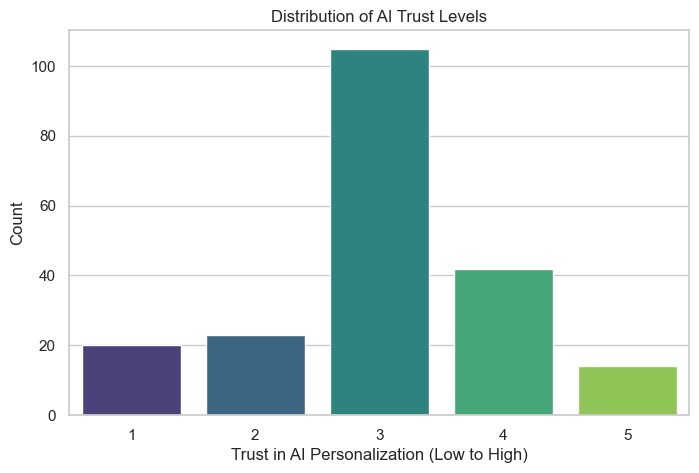

In [5]:
# AI Trust Level Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df_cleaned["AI_Trust"], palette="viridis")
plt.xlabel("Trust in AI Personalization (Low to High)")
plt.ylabel("Count")
plt.title("Distribution of AI Trust Levels")
plt.show()

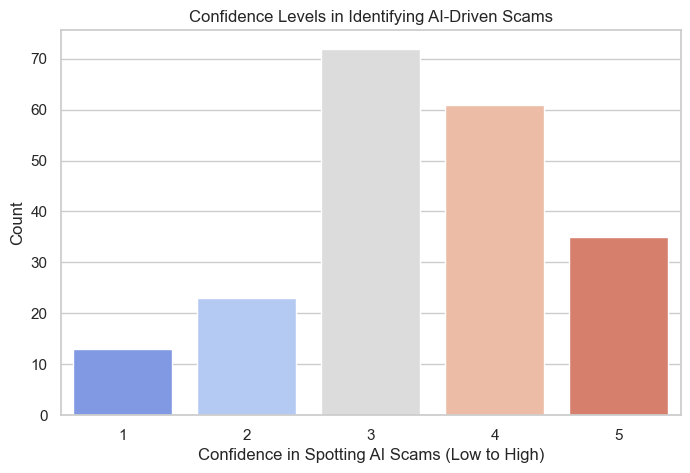

In [6]:
# Cybersecurity Awareness Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df_cleaned["Scam_Confidence"], palette="coolwarm")
plt.xlabel("Confidence in Spotting AI Scams (Low to High)")
plt.ylabel("Count")
plt.title("Confidence Levels in Identifying AI-Driven Scams")
plt.show()

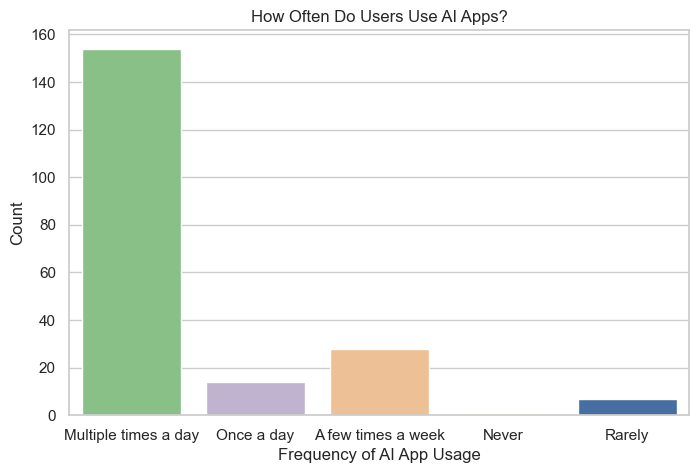

In [7]:
# AI Usage Frequency Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df["How frequently do you use AI-powered apps (Instagram, Amazon, ChatGPT, Google Assistant)?  "], palette="Accent")
plt.xlabel("Frequency of AI App Usage")
plt.ylabel("Count")
plt.title("How Often Do Users Use AI Apps?")

plt.show()

In [8]:
print(df_cleaned["AI_Usage_Freq"].value_counts())
print(df_cleaned["AI_Usage_Freq"].unique())
print(df_cleaned["AI_Usage_Freq"].dtype)


AI_Usage_Freq
1    154
0     28
3     14
4      7
2      1
Name: count, dtype: int64
[1 3 0 2 4]
int32


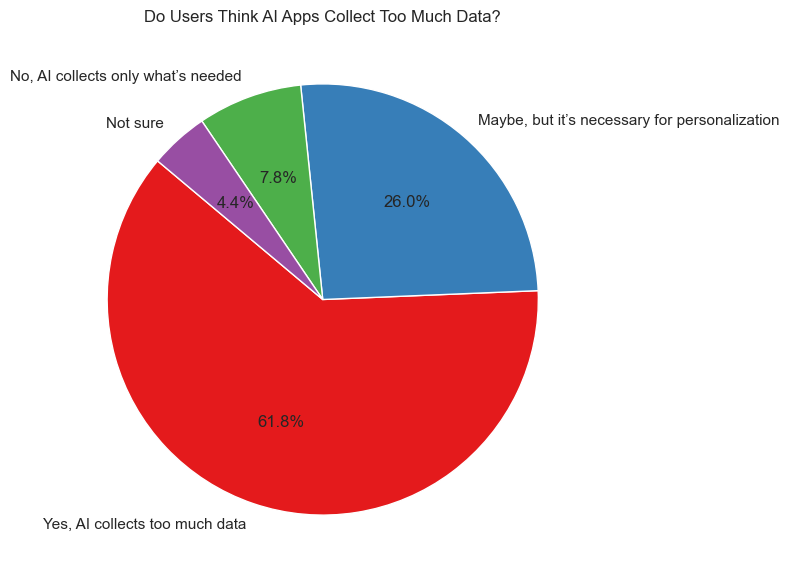

In [9]:
# Count the values in the column
privacy_counts = df["Do you believe AI apps collect more personal data than they should?  "].value_counts()

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(privacy_counts, labels=privacy_counts.index, autopct="%1.1f%%", colors=sns.color_palette("Set1"), startangle=140)

# Set title
plt.title("Do Users Think AI Apps Collect Too Much Data?")

# Show the plot
plt.show()

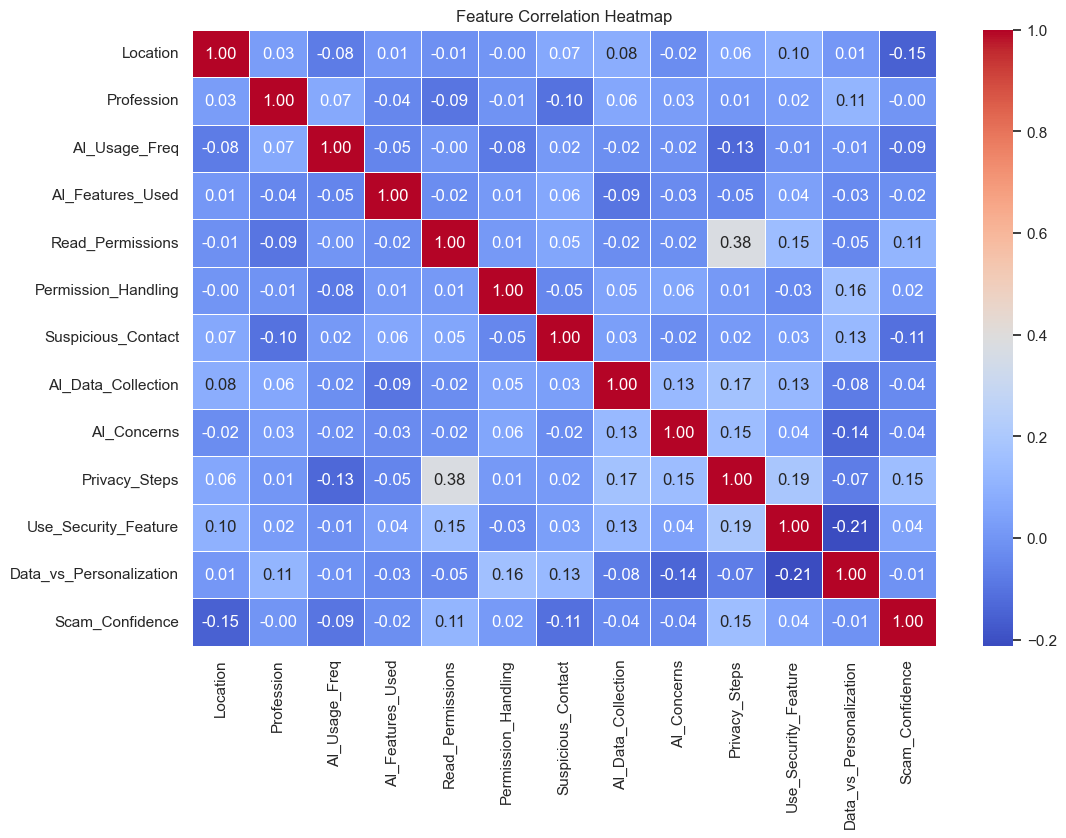

In [43]:
# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


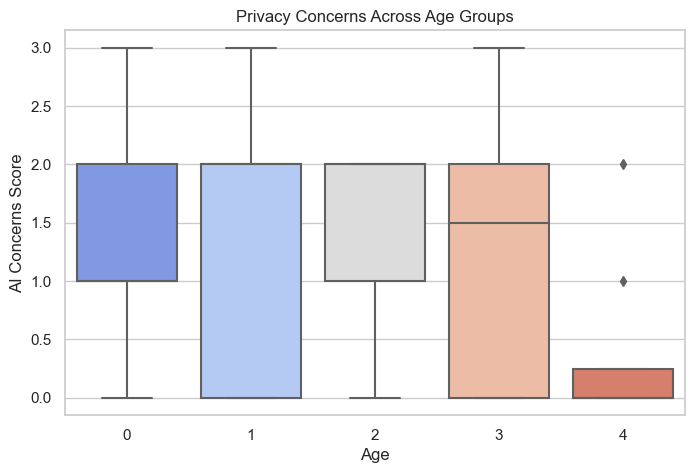

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_cleaned["Age"], y=df_cleaned["AI_Concerns"], palette="coolwarm")
plt.xlabel("Age")
plt.ylabel("AI Concerns Score")
plt.title("Privacy Concerns Across Age Groups")
plt.show()

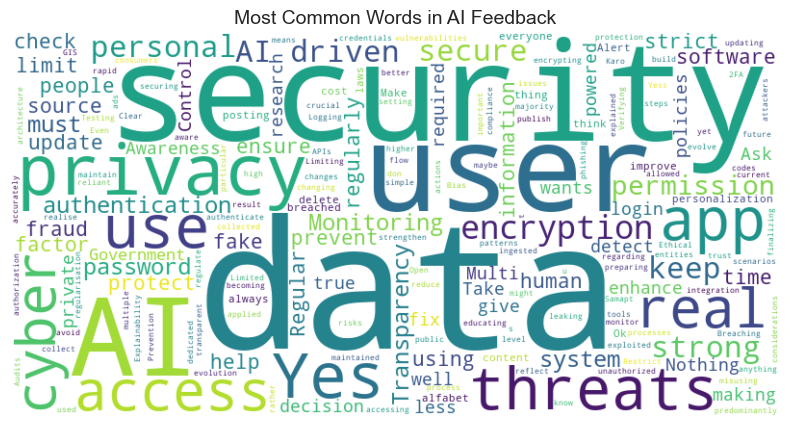

In [12]:
from wordcloud import WordCloud

# Combine all text responses (replace 'Feedback_Column' with actual column name)
text = " ".join(df["What steps do you think AI-driven apps should take to enhance security? (Optional)"].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in AI Feedback", fontsize=14)
plt.show()


In [13]:
!pip install squarify

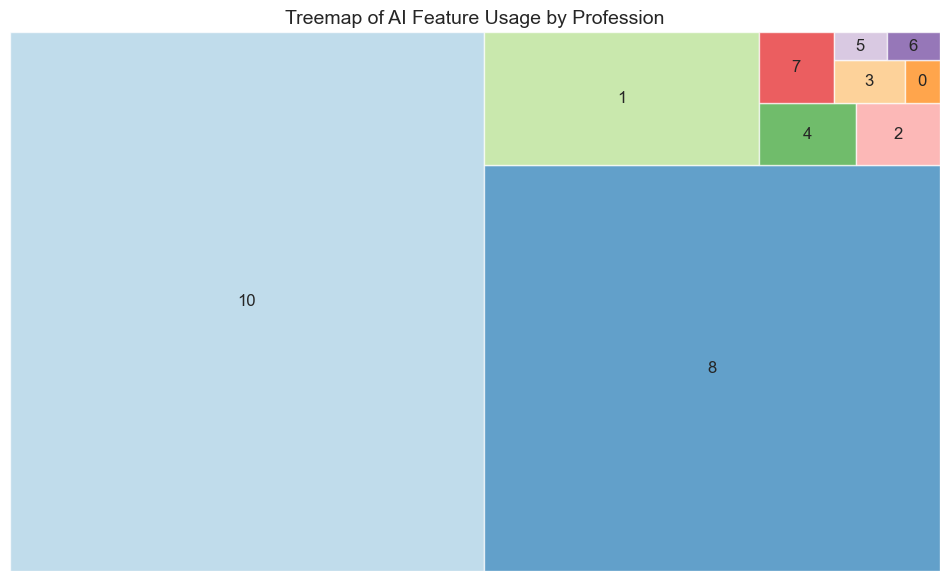

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Sample Data: Ensure df_cleaned has the correct columns
if "AI_Features_Used" not in df_cleaned.columns or "Profession" not in df_cleaned.columns:
    raise KeyError("Ensure 'AI_Features_Used' and 'Profession' columns exist in df_cleaned.")

# Aggregate data by profession
profession_usage = df_cleaned.groupby("Profession")["AI_Features_Used"].sum().reset_index()

# Sort data and filter out small values for better visibility
profession_usage = profession_usage.sort_values(by="AI_Features_Used", ascending=False)
profession_usage = profession_usage[profession_usage["AI_Features_Used"] > 5]  # Adjust threshold if needed

# Define labels and sizes
labels = profession_usage["Profession"]
sizes = profession_usage["AI_Features_Used"]

# Create the treemap
plt.figure(figsize=(12, 7))
squarify.plot(sizes=sizes, label=labels, alpha=0.7, color=plt.cm.Paired.colors)

# Formatting
plt.title("Treemap of AI Feature Usage by Profession", fontsize=14)
plt.axis("off")  # Hide axes for better appearance
plt.show()


C:\Users\Parisha Bansal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


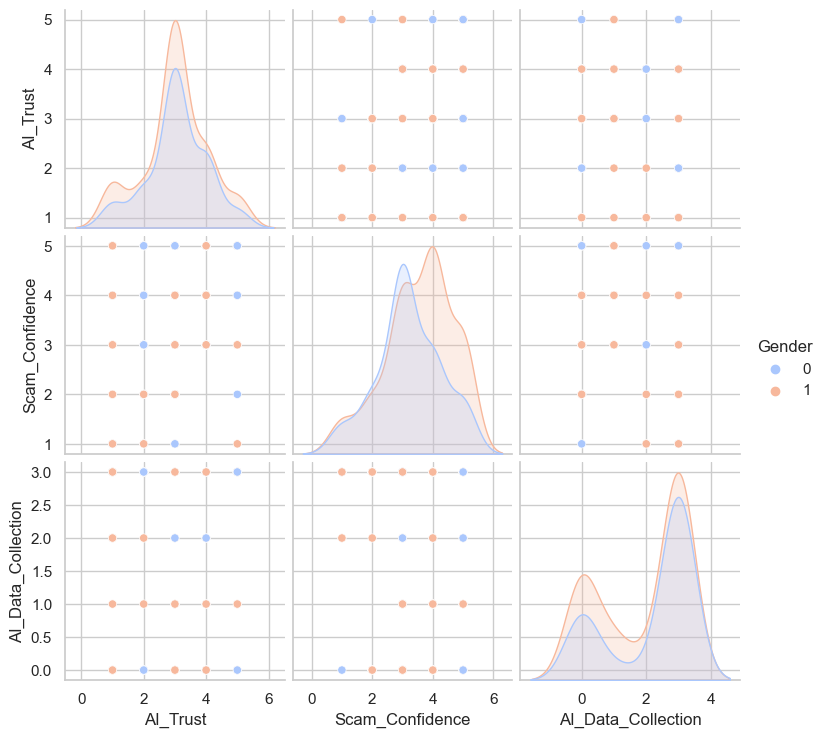

In [15]:
# Check pairwise relationships for top correlated variables
sns.pairplot(df_cleaned, vars=["AI_Trust", "Scam_Confidence", "AI_Data_Collection"], hue="Gender", palette="coolwarm")
plt.show()

In [16]:
from scipy.stats import chi2_contingency

# Cross-tabulation for AI_Usage_Freq and Privacy_Steps
ct = pd.crosstab(df_cleaned['AI_Usage_Freq'], df_cleaned['Privacy_Steps'])
chi2, p, dof, expected = chi2_contingency(ct)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 63.44559618375152
P-value: 5.276363520830581e-09


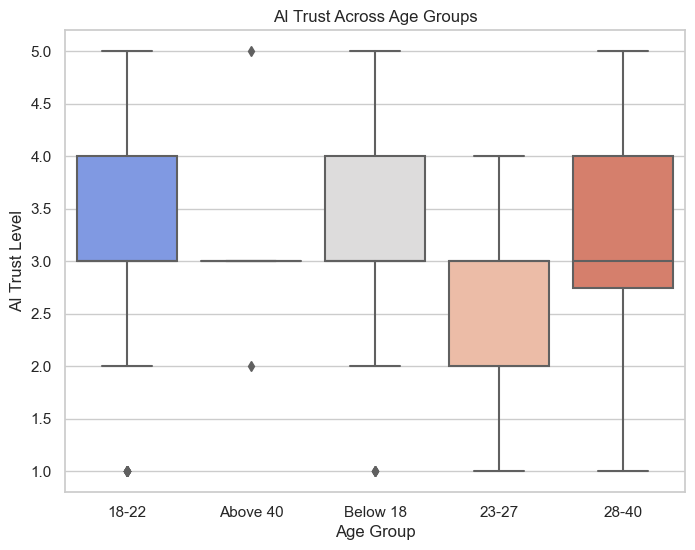

In [17]:
# Define the correct age group labels
age_mapping = {
    0: "Below 18",
    1: "18-22",
    2: "23-27",
    3: "28-40",
    4: "Above 40"
}

# Replace numerical Age values with categorical labels
df_cleaned["Age"] = df_cleaned["Age"].replace(age_mapping)

# Boxplot to compare AI Trust across different Age Groups
plt.figure(figsize=(8, 6))
sns.boxplot(x="Age", y="AI_Trust", data=df_cleaned, palette="coolwarm")

# Add title and labels
plt.title("AI Trust Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("AI Trust Level")

plt.show()

<Figure size 800x600 with 0 Axes>

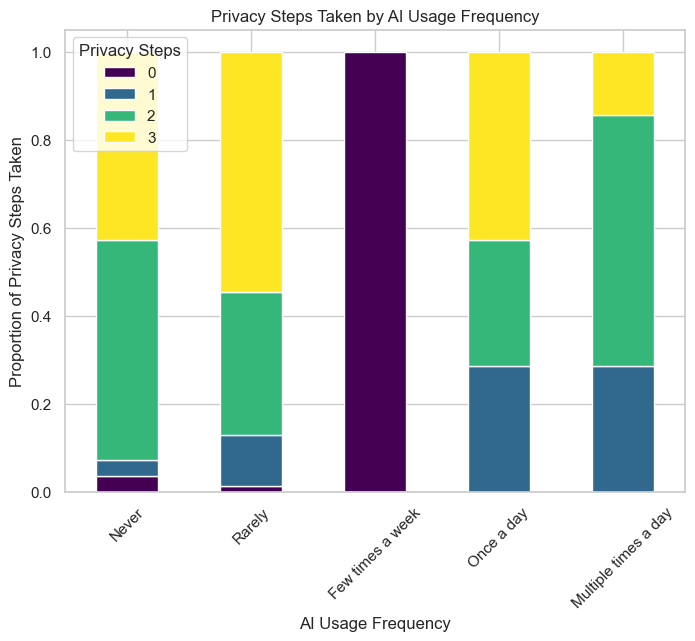

In [18]:
# Define the mapping for AI_Usage_Freq
ai_usage_mapping = {
    "Never": 0,
    "Rarely": 1,
    "A few times a week": 2,
    "Once a day": 3,
    "Multiple times a day": 4
}

# Apply the mapping to AI_Usage_Freq
df_cleaned["AI_Usage_Freq"] = df_cleaned["AI_Usage_Freq"].replace(ai_usage_mapping)

# Stacked bar chart of AI_Usage_Freq vs. Privacy_Steps
plt.figure(figsize=(8, 6))
ct_freq_privacy = pd.crosstab(df_cleaned["AI_Usage_Freq"], df_cleaned["Privacy_Steps"], normalize="index")

# Plot the stacked bar chart with correct order of AI_Usage_Freq
ct_freq_privacy.plot(kind="bar", stacked=True, colormap="viridis", figsize=(8, 6))
plt.title("Privacy Steps Taken by AI Usage Frequency")
plt.xlabel("AI Usage Frequency")
plt.ylabel("Proportion of Privacy Steps Taken")
plt.legend(title="Privacy Steps")
plt.xticks(ticks=range(5), labels=["Never", "Rarely", "Few times a week", "Once a day", "Multiple times a day"], rotation=45)
plt.show()


C:\Users\Parisha Bansal\AppData\Local\Temp\ipykernel_23212\1887775985.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_cleaned[df_cleaned["Location"] == 0]["AI_Trust"], label="Location 0", fill=True, color="blue", alpha=0.5)


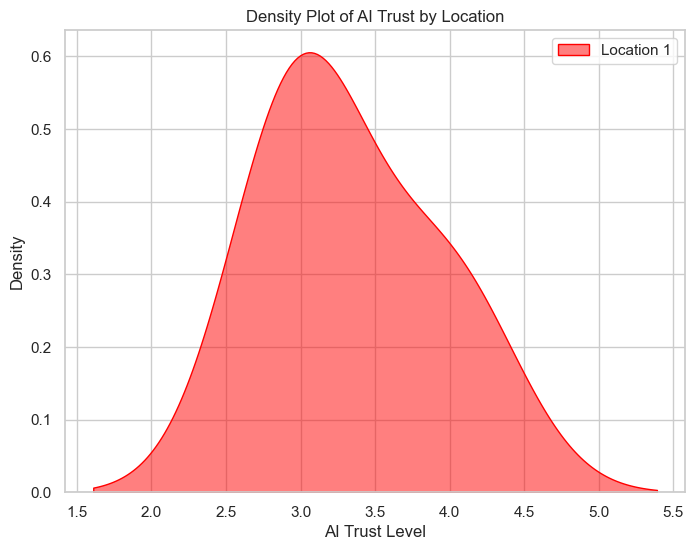

In [19]:
# Density plot for AI_Trust vs. Scam_Confidence by Location
plt.figure(figsize=(8, 6))
sns.kdeplot(df_cleaned[df_cleaned["Location"] == 0]["AI_Trust"], label="Location 0", fill=True, color="blue", alpha=0.5)
sns.kdeplot(df_cleaned[df_cleaned["Location"] == 1]["AI_Trust"], label="Location 1", fill=True, color="red", alpha=0.5)
plt.title("Density Plot of AI Trust by Location")
plt.xlabel("AI Trust Level")
plt.ylabel("Density")
plt.legend()
plt.show()

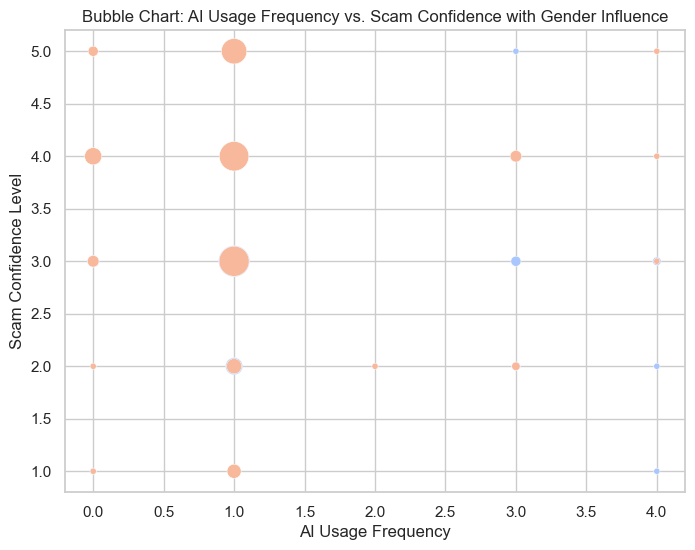

In [20]:
# Bubble chart for AI_Usage_Freq vs. Scam_Confidence with Gender influence
bubble_data = df_cleaned.groupby(["AI_Usage_Freq", "Scam_Confidence", "Gender"]).size().reset_index(name="count")

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="AI_Usage_Freq", y="Scam_Confidence", size="count", hue="Gender",
    data=bubble_data, sizes=(20, 500), palette="coolwarm", legend=False
)
plt.title("Bubble Chart: AI Usage Frequency vs. Scam Confidence with Gender Influence")
plt.xlabel("AI Usage Frequency")
plt.ylabel("Scam Confidence Level")
plt.show()

<Figure size 800x600 with 0 Axes>

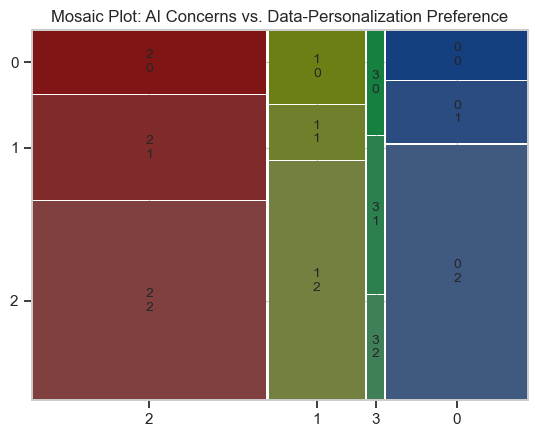

In [21]:
from statsmodels.graphics.mosaicplot import mosaic

# Mosaic plot for AI Concerns vs. Data vs. Personalization
plt.figure(figsize=(8, 6))
mosaic(df_cleaned, ['AI_Concerns', 'Data_vs_Personalization'], title="Mosaic Plot: AI Concerns vs. Data-Personalization Preference")
plt.show()

C:\Users\Parisha Bansal\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Parisha Bansal\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Parisha Bansal\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Parisha Bansal\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Parisha Bansal\anaconda3\Lib\site-packages\seaborn\categoric

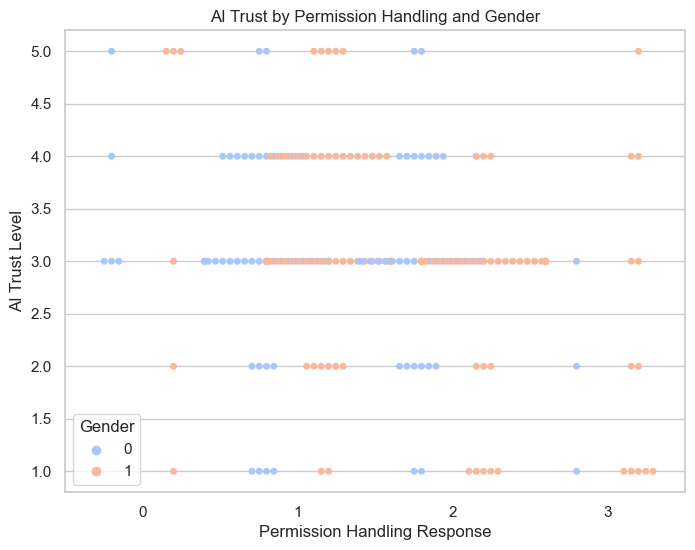

In [22]:
# Swarm plot for Permission_Handling vs. AI_Trust
plt.figure(figsize=(8, 6))
sns.swarmplot(x="Permission_Handling", y="AI_Trust", data=df_cleaned, hue="Gender", palette="coolwarm", dodge=True)
plt.title("AI Trust by Permission Handling and Gender")
plt.xlabel("Permission Handling Response")
plt.ylabel("AI Trust Level")
plt.show()

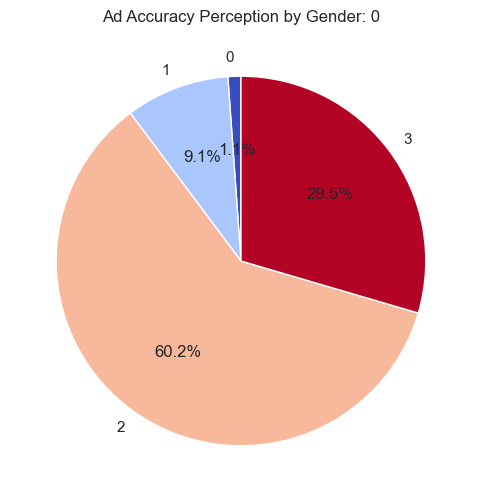

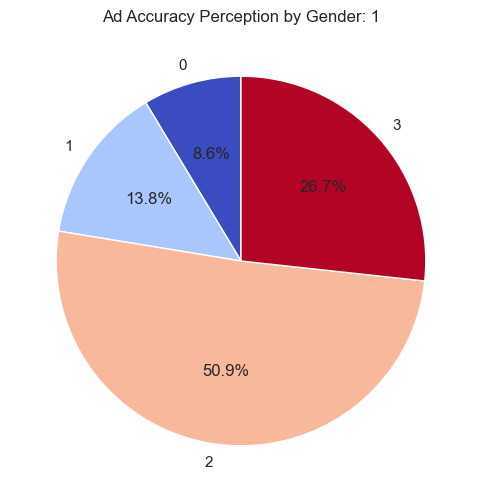

In [23]:
# Pie chart for Ad_Accuracy perception by Gender
ad_accuracy_gender = df_cleaned.groupby("Gender")["Ad_Accuracy"].value_counts(normalize=True).unstack()

for gender in ad_accuracy_gender.index:
    plt.figure(figsize=(6, 6))
    ad_accuracy_gender.loc[gender].plot(kind="pie", autopct="%1.1f%%", startangle=90, cmap="coolwarm", legend=False)
    plt.title(f"Ad Accuracy Perception by Gender: {gender}") #0 for female , 1  for male
    plt.ylabel("")
    plt.show()

C:\Users\Parisha Bansal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Parisha Bansal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


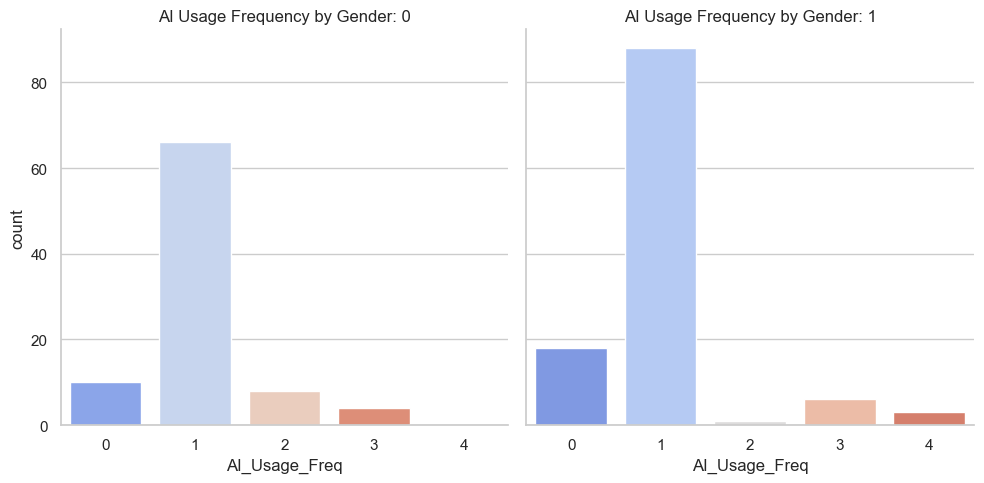

In [24]:
# FacetGrid to explore AI_Usage_Freq vs. Privacy_Steps by Gender
g = sns.FacetGrid(df_cleaned, col="Gender", height=5, aspect=1)
g.map(sns.countplot, "AI_Usage_Freq", palette="coolwarm")
g.set_titles("AI Usage Frequency by Gender: {col_name}")
plt.show()

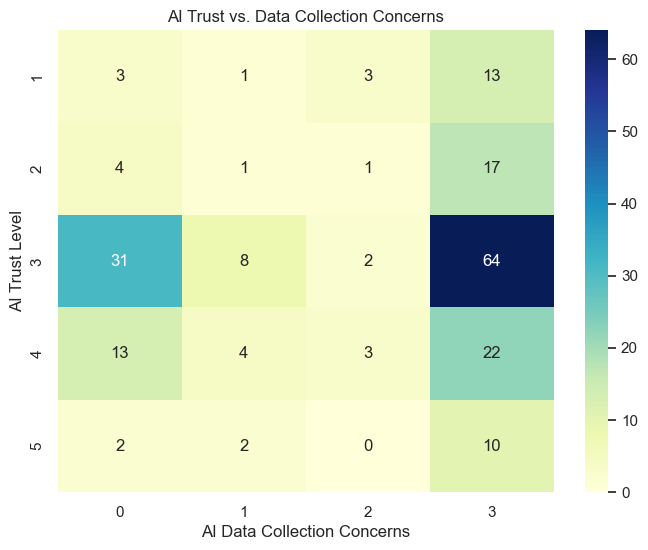

In [25]:
# Create a heatmap of AI_Trust and AI_Data_Collection
ct_trust_data = pd.crosstab(df_cleaned["AI_Trust"], df_cleaned["AI_Data_Collection"])

plt.figure(figsize=(8, 6))
sns.heatmap(ct_trust_data, annot=True, cmap="YlGnBu", fmt="d")
plt.title("AI Trust vs. Data Collection Concerns")
plt.xlabel("AI Data Collection Concerns")
plt.ylabel("AI Trust Level")
plt.show()

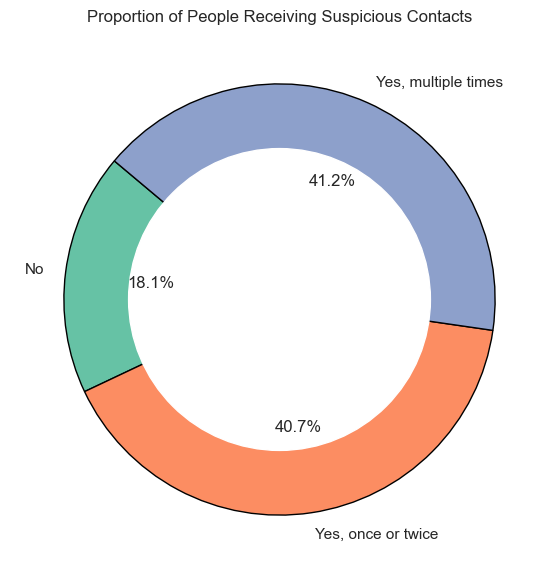

In [26]:
# Count values for each category
suspicious_contact_counts = df_cleaned["Suspicious_Contact"].value_counts().sort_index()

# Labels for categories
labels = ["No", "Yes, once or twice", "Yes, multiple times"]

# Colors for better visualization
colors = ["#66c2a5", "#fc8d62", "#8da0cb"]

plt.figure(figsize=(7, 7))
plt.pie(suspicious_contact_counts, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Draw a white circle at the center to create a donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc="white")
plt.gca().add_artist(centre_circle)

plt.title("Proportion of People Receiving Suspicious Contacts")
plt.show()

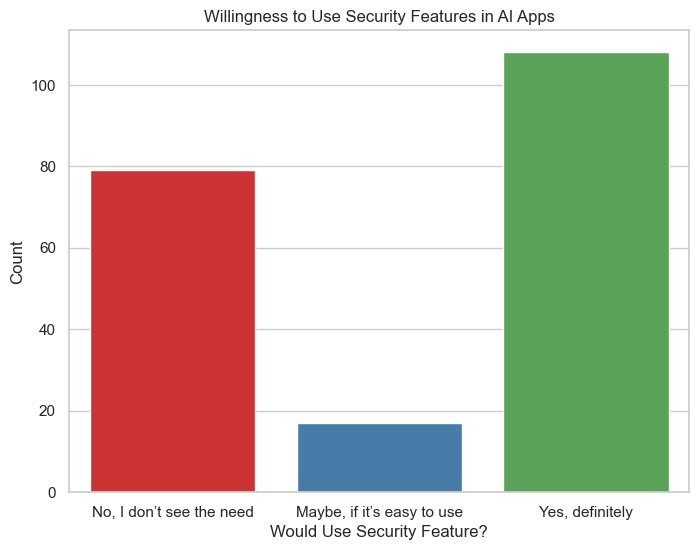

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Use_Security_Feature", data=df_cleaned, palette="Set1")

# Renaming x-tick labels
plt.xticks(ticks=[0, 1, 2], labels=["No, I don’t see the need", "Maybe, if it’s easy to use", "Yes, definitely"])

plt.title("Willingness to Use Security Features in AI Apps")
plt.xlabel("Would Use Security Feature?")
plt.ylabel("Count")
plt.show()

✅ Dropped irrelevant columns successfully!
🔍 Non-numeric columns to encode: Index(['Age'], dtype='object')
✅ Label Encoding Applied Successfully!
✅ Dropped all remaining non-numeric columns!
✅ Selected Top Features: ['Age', 'Location', 'Education', 'AI_Features_Used', 'Read_Permissions', 'Permission_Handling', 'AI_Concerns', 'Scam_Confidence']

🔹 Random Forest (With Selected Features) Results:
              precision    recall  f1-score   support

           1       0.25      0.33      0.29         3
           2       0.00      0.00      0.00         4
           3       0.53      0.95      0.68        19
           4       0.50      0.10      0.17        10
           5       0.00      0.00      0.00         5

    accuracy                           0.49        41
   macro avg       0.26      0.28      0.23        41
weighted avg       0.39      0.49      0.38        41

Confusion Matrix:
 [[ 1  0  2  0  0]
 [ 0  0  3  1  0]
 [ 1  0 18  0  0]
 [ 1  1  7  1  0]
 [ 1  0  4  0  0]]

🔹 G

C:\Users\Parisha Bansal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Parisha Bansal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Parisha Bansal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pari

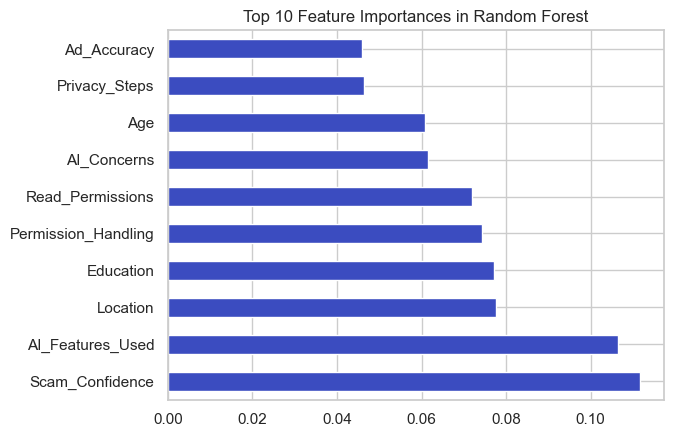

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel

# Copy cleaned dataset to a new variable called 'data'
data = df_cleaned.copy()

# 🔹 Step 1: Drop Free-Text or Irrelevant Columns
# Drop problematic columns and unnecessary features
irrelevant_cols = ["Security_Suggestions", "Age Group"]  # Drop irrelevant columns
data.drop(columns=irrelevant_cols, errors="ignore", inplace=True)
print("✅ Dropped irrelevant columns successfully!")

# 🔹 Step 2: Identify Non-Numeric Columns for Encoding
non_numeric_cols = data.select_dtypes(include=["object"]).columns
print("🔍 Non-numeric columns to encode:", non_numeric_cols)

# 🔹 Step 3: Apply Label Encoding to All Categorical Columns
label_encoders = {}  # Store encoders for future use
for col in non_numeric_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # Convert strings to numeric labels
    label_encoders[col] = le  # Save encoder for potential inverse transformation

print("✅ Label Encoding Applied Successfully!")

# 🔹 Step 4: Drop Any Remaining Non-Numeric Columns
data = data.select_dtypes(include=[np.number])  # Keep only numeric columns
print("✅ Dropped all remaining non-numeric columns!")

# 🔹 Step 5: Handle Missing Values
if data.isnull().sum().sum() > 0:
    print("⚠️ Warning: Missing values detected! Filling with mode.")
    data.fillna(data.mode().iloc[0], inplace=True)

# 🔹 Step 6: Define Target and Features
target = "AI_Trust"  # Change this if needed
X = data.drop(columns=[target], errors="ignore")  # Features
y = data[target]

# 🔹 Step 7: Split Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Step 8: Standardize Numerical Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔹 Step 9: Train Random Forest Model for Feature Importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 🔹 Step 10: Feature Selection Based on Importance
feature_selector = SelectFromModel(rf_model, prefit=True, threshold="mean")  # Select features above mean importance
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

selected_features = X.columns[feature_selector.get_support()]
print(f"✅ Selected Top Features: {list(selected_features)}")

# 🔹 Step 11: Retrain Models Using Selected Features
# Train Random Forest on Selected Features
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# Train Gradient Boosting on Selected Features
gb_model_selected = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model_selected.fit(X_train_selected, y_train)

# 🔹 Step 12: Model Evaluation
print("\n🔹 Random Forest (With Selected Features) Results:")
print(classification_report(y_test, rf_model_selected.predict(X_test_selected)))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_model_selected.predict(X_test_selected)))

print("\n🔹 Gradient Boosting (With Selected Features) Results:")
print(classification_report(y_test, gb_model_selected.predict(X_test_selected)))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_model_selected.predict(X_test_selected)))

# 🔹 Step 13: Feature Importance Visualization
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', colormap="coolwarm")
plt.title("Top 10 Feature Importances in Random Forest")
plt.show()

##Model


🔹 Random Forest Results (After Feature Selection):
              precision    recall  f1-score   support

           1       1.00      0.33      0.50         3
           2       0.00      0.00      0.00         4
           3       0.51      1.00      0.68        19
           4       1.00      0.20      0.33        10
           5       1.00      0.20      0.33         5

    accuracy                           0.56        41
   macro avg       0.70      0.35      0.37        41
weighted avg       0.68      0.56      0.47        41

Confusion Matrix:
 [[ 1  0  2  0  0]
 [ 0  0  4  0  0]
 [ 0  0 19  0  0]
 [ 0  0  8  2  0]
 [ 0  0  4  0  1]]


C:\Users\Parisha Bansal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Parisha Bansal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Parisha Bansal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


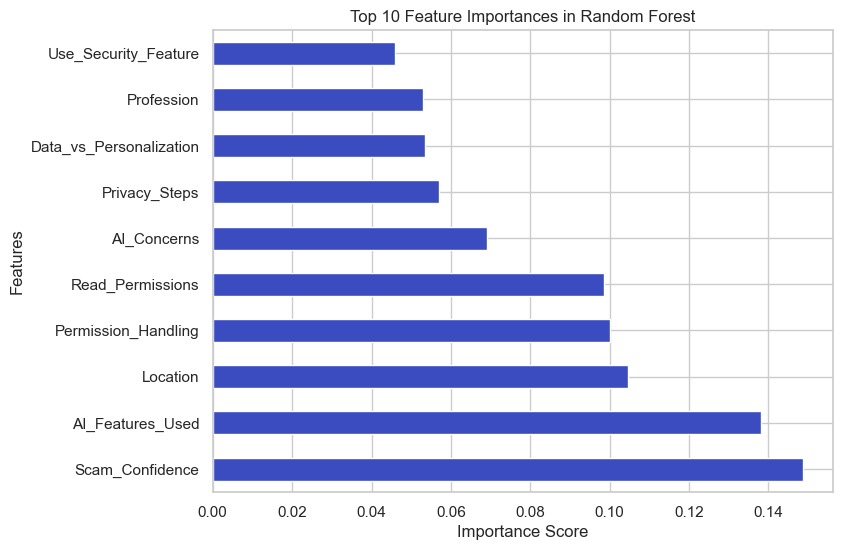

In [40]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define Target and Features Again After Dropping Low-Correlation Columns
target = "AI_Trust"  # Update this if needed
columns_to_drop = ["Ad_Accuracy","Gender","Education","Age"] # Replace with column names to drop
X = data.drop(columns=[target] + columns_to_drop, errors="ignore")  # Drop selected columns
y = data[target]

# Split Dataset into Train and Test Again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a New Random Forest Model on the Updated Features
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate Model Performance
print("\n🔹 Random Forest Results (After Feature Selection):")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Show Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 6))
feat_importances.nlargest(10).plot(kind='barh', colormap="coolwarm")
plt.title("Top 10 Feature Importances in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()